<a href="https://colab.research.google.com/github/Kudasai03/DataVisualization/blob/main/PredictModel_PCA_Toan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install gdown

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import seaborn as sns
import re
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!gdown 10cV9FiQxGY4Uy4ushJDIvXoUjHGFAhI6

Downloading...
From: https://drive.google.com/uc?id=10cV9FiQxGY4Uy4ushJDIvXoUjHGFAhI6
To: /content/data_type.xlsx
100% 552k/552k [00:00<00:00, 22.0MB/s]


In [ ]:
df = pd.read_excel('/content/data_type.xlsx')

In [ ]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,4.0,1,13,1,2,1,22,27,10,...,0,7,7,0,0.000000,0,12.7,3.7,-1.70,Dropout
1,2.0,12.0,1,4,1,3,1,3,14,5,...,6,12,14,12,17.692308,0,16.2,0.3,-0.92,Graduate
2,2.0,12.0,1,7,1,1,1,19,24,1,...,0,5,9,2,13.000000,0,9.4,-0.8,-3.12,Dropout
3,1.0,12.0,1,8,1,1,1,1,14,5,...,0,5,10,3,13.333333,2,10.8,1.4,1.74,Dropout
4,1.0,14.0,1,7,1,1,1,22,28,6,...,0,5,11,1,17.000000,0,13.9,-0.3,0.79,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1.0,3,2,1,1,1,1,3,6,...,0,0,0,0,0.000000,0,12.7,3.7,-1.70,Graduate
4420,1.0,12.0,1,4,1,1,1,10,10,10,...,0,6,10,0,0.000000,0,12.4,0.5,1.79,Dropout
4421,1.0,14.0,1,17,0,1,1,22,27,10,...,0,5,5,0,0.000000,0,7.6,2.6,0.32,Dropout
4422,1.0,1.0,2,10,1,1,1,1,14,5,...,0,5,11,0,0.000000,0,9.4,-0.8,-3.12,Enrolled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4398 non-null   float64
 1   Application mode                                4289 non-null   float64
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

## 1 Tiền xử lí dữ liệu
###### In ra các dữ liệu bị thiếu
###### Xử lí các cột dữ liệu dữ liệu bị thiếu
###### In ra tổng số giá trị duy nhất của mỗi cột
###### Xác định các cột nhị phân

In [ ]:
# Chuyển về định dạng lowercase
df.columns = [col.lower() for col in df.columns]

In [ ]:
# Liệt kê ra có các cột có tên đặc biệt (chứa 's ; () )
special_columns_name = []
for col in df.columns:
    if re.search(r"('s[ ])|(\s\()", col):
        special_columns_name.append(col)
        cols_to_rename = [val for val in df.columns if val not in special_columns_name]
renamed = [val.replace(" ","_") for val in cols_to_rename]
dictr = {key: value for key, value in zip(cols_to_rename, renamed)}
df.rename(columns=dictr,inplace=True)
special_columns_name

["mother's qualification",
 "father's qualification",
 "mother's occupation",
 "father's occupation",
 'curricular units 1st sem (credited)',
 'curricular units 1st sem (enrolled)',
 'curricular units 1st sem (evaluations)',
 'curricular units 1st sem (approved)',
 'curricular units 1st sem (grade)',
 'curricular units 1st sem (without evaluations)',
 'curricular units 2nd sem (credited)',
 'curricular units 2nd sem (enrolled)',
 'curricular units 2nd sem (evaluations)',
 'curricular units 2nd sem (approved)',
 'curricular units 2nd sem (grade)',
 'curricular units 2nd sem (without evaluations)']

In [ ]:
# Gộp những cột Curicular_units 1st vs 2nd vì nó có sự tương quan với nhau, và tổng lại thì nó là số tín chỉ trong 1 năm học
column_indexes = list(range(4,10))
column_suffixes = ['curicular_units_credited', 'curicular_units_enrolled', 'curicular_units_evals',
                   'curicular_units_grade', 'curicular_units_grade', 'curicular_units_without_evals']

# Tương tự với Parent_occupation
column_indexes2 = list(range(0,4))
column_suffixes2 = ['parent_occupation','parent_qualification']

for i, suffix in zip(column_indexes, column_suffixes):
    df[suffix] = df[special_columns_name[i]] + df[special_columns_name[i + 6]]
for i, suffix in zip(column_indexes2, column_suffixes2):
    df[suffix] = df[special_columns_name[i]] + df[special_columns_name[i + 2]]
df.drop(columns=special_columns_name,inplace=True)

In [ ]:
len(df.columns)

26

In [ ]:
# Xử lí vì tỷ lệ missing khá thấp và tỉ lệ 1 chiếm hơn 88% nên thay missing value bằng số xuất hiện nhiều nhất
df['marital_status'] = df['marital_status'].fillna(df['marital_status'].mode()[0])

In [ ]:
df['application_mode'] = df['application_mode'].fillna(df['application_mode'].mode()[0])

In [ ]:
age_mean_value = round(df['age_at_enrollment'].mean())
print(f"Trung bình của tuổi khi nhập học: {age_mean_value}")
age_median_value = df['age_at_enrollment'].median()
print(f"Trung vị của tuổi khi nhập học: {age_median_value}")

Trung bình của tuổi khi nhập học: 23
Trung vị của tuổi khi nhập học: 20.0


In [ ]:
# Điền mode của phương thức nhập học vào các giá trị bị mất
df['age_at_enrollment'] = df['age_at_enrollment'].fillna(round(ge_median_value))

In [ ]:
df['previous_qualification'] = df['previous_qualification'].replace({
    1: '1',
    2: '2',
    3: '2',
    4: '2',
    5: '2',
    6: '2',
    7: '0',
    8: '0',
    9: '0',
    10: '0',
    11: '0',
    12: '0',
    13: '0',
    14: '3',
    15: '3',
    16: '3',
    17: '3',})


In [ ]:
df['course'] = df['course'].replace({
    1: '1',
    2: '1',
    3: '2',
    4: '3',
    5: '1',
    6: '3',
    7: '1',
    8: '3',
    9: '2',
    10: '2',
    11: '4',
    12: '5',
    13: '5',
    14: '4',
    15: '4',
    16: '4',
    17: '2',
})


#Model

In [ ]:
pip install pandas matplotlib seaborn statsmodels

In [ ]:
df['target'] = df['target'].replace({'Dropout':0,'Enrolled':1,'Graduate':1})
df['target']

0       0
1       1
2       0
3       0
4       0
       ..
4419    1
4420    0
4421    0
4422    1
4423    0
Name: target, Length: 4424, dtype: int64

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

course: ['5' '3' '1' '2' '4']
previous_qualification: ['2' '1' '3' '0']


In [ ]:
from sklearn import preprocessing
for col in df.select_dtypes(include=['object']).columns:
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(df[col].unique())
    df[col] = label_encoder.transform(df[col])

    print(f"{col}: {df[col].unique()}")

course: [4 2 0 1 3]
previous_qualification: [2 1 3 0]


Chuyen ve dang int de chay model. Chi predict Dropout hay khong, (gop Enrolled,Gradute lai thanh 1)

In [ ]:
target = df['target']
features = df.drop(['target'], axis=1)
target.shape, features.shape

((4424,), (4424, 25))

In [ ]:
from sklearn.model_selection import train_test_split, KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 2304)
for tr_idx, te_idx in kf.split(features):
    X_train, X_test = features.iloc[tr_idx], features.iloc[te_idx]
    y_train, y_test = target.iloc[tr_idx], target.iloc[te_idx]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3540, 25), (884, 25), (3540,), (884,))

# k-NN

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] }

knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=10)
knn_grid_search.fit(X_train, y_train)
print("K-NN Best Parameters:", knn_grid_search.best_params_)

K-NN Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_param_grid = {}
nb_grid_search = GridSearchCV(nb, nb_param_grid, cv=5)
nb_grid_search.fit(X_train, y_train)
print("Naive Bayes Best Parameters:", nb_grid_search.best_params_)

Naive Bayes Best Parameters: {}


In [ ]:
# Naive Bayes Best Model
nb_best_model = nb_grid_search.best_estimator_
y_pred_nb = nb_best_model.predict(X_test)

# Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'random_state': [0, 30]
}
grid_search = GridSearchCV(dtree, param_grid, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=2, min_samples_split=2,class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=2,
                       random_state=0)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [10, 20, 50],
    'max_depth': [None, 2, 4],
    'random_state': [0, 20]}
grid_search = GridSearchCV(rfc, param_grid, cv=10)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': None, 'n_estimators': 50, 'random_state': 0}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=50, max_depth=None, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 86.31 %


Text(0.5, 1.0, 'Accuracy Score for Randomforest: 0.8631221719457014')

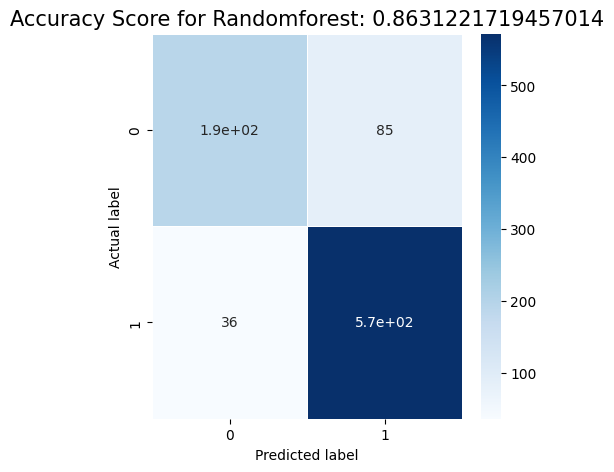

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Randomforest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
Classifiers=[
    ["Random_Forest",RandomForestClassifier()],
    ["KNN",KNeighborsClassifier()],
    ["Naive_Bayes",GaussianNB()],
    ["Decision_Tree",DecisionTreeClassifier()]]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
name_list = []
recall_list = []
precision_list = []
f1_list = []
acc_list = []
for name, classifier in Classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    globals()[f'pred_result_{name}'] = pd.DataFrame({"true_label": y_test.squeeze(), "predict": pred})

    recall = recall_score(y_test, pred, average='macro')
    precision = precision_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    accuracy = accuracy_score(y_test, pred)
    name_list.append(name)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    acc_list.append(accuracy)

In [ ]:
performance = pd.DataFrame({"name":name_list, "recall":recall_list, "precision":precision_list,
                        "f1_score":f1_list, "accuracy":acc_list })
performance

,name,recall,precision,f1_score,accuracy
0,Random_Forest,0.810641,0.859038,0.828638,0.861991
1,KNN,0.727331,0.775000,0.742624,0.796380
2,Naive_Bayes,0.775470,0.765593,0.769991,0.798643
3,Decision_Tree,0.756364,0.752465,0.754328,0.787330


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
Classifiers=[
    ["Random_Forest",RandomForestClassifier(random_state=0, n_estimators=50, max_depth=None, class_weight='balanced')],
    ["KNN",KNeighborsClassifier(n_neighbors= 7, p= 2, weights='distance')],
    ["Naive_Bayes",GaussianNB()],
    ["Decision_Tree",DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_leaf=2, min_samples_split=2,class_weight='balanced')]]

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
name_list = []
recall_list = []
precision_list = []
f1_list = []
acc_list = []
for name, classifier in Classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    globals()[f'pred_result_{name}'] = pd.DataFrame({"true_label": y_test.squeeze(), "predict": pred})

    recall = recall_score(y_test, pred, average='macro')
    precision = precision_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    accuracy = accuracy_score(y_test, pred)
    name_list.append(name)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    acc_list.append(accuracy)

In [ ]:
performance = pd.DataFrame({"name":name_list, "recall":recall_list, "precision":precision_list,
                        "f1_score":f1_list, "accuracy":acc_list })
performance

,name,recall,precision,f1_score,accuracy
0,Random_Forest,0.816409,0.856017,0.831896,0.863122
1,KNN,0.736044,0.803900,0.755670,0.811086
2,Naive_Bayes,0.775470,0.765593,0.769991,0.798643
3,Decision_Tree,0.798865,0.777138,0.785210,0.807692


PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(df)

In [ ]:
target = 'target'
print('* Biến phân lớp:', target)

## Danh sách các features
nb_features = df.shape[1] - 1
features    = df.columns[:nb_features]
print('* Số lượng features = %2d' %nb_features)
print('  Các features:', ', '.join(features))

* Biến phân lớp: target
* Số lượng features = 25
  Các features: marital_status, application_mode, application_order, course, daytime/evening_attendance, previous_qualification, nacionality, displaced, educational_special_needs, debtor, tuition_fees_up_to_date, gender, scholarship_holder, age_at_enrollment, international, unemployment_rate, inflation_rate, gdp, target, curicular_units_credited, curicular_units_enrolled, curicular_units_evals, curicular_units_grade, curicular_units_without_evals, parent_occupation


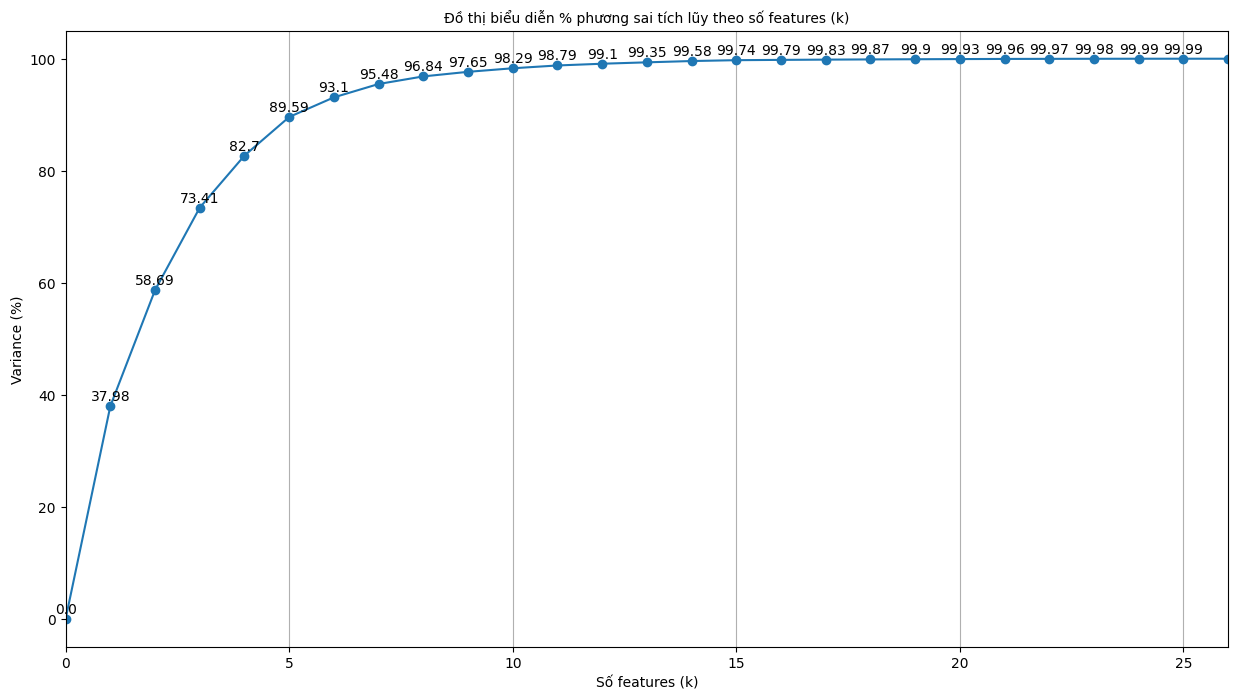

In [ ]:
points = np.cumsum(pca.explained_variance_ratio_) * 100
points = np.insert(points, 0, 0)
x_i = np.arange(0, nb_features + 1)
y_i = (points[-35:])//0.01/100
plt.figure(figsize = (15, 8))
plt.plot(points, marker = 'o')
plt.xlabel('Số features (k)', fontproperties='Arial Unicode MS')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)', fontproperties='Arial Unicode MS')
plt.xlim([0, nb_features + 1])
plt.grid(axis = 'x')
for i in x_i:
    plt.text(i, y_i[i] + 1, y_i[i], ha = 'center', va = 'baseline')
plt.show()

=> Lấy k = 8

In [ ]:
from sklearn.decomposition import PCA
k = 8
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

name_list = []
recall_list = []
precision_list = []
f1_list = []
acc_list = []

for name, classifier in Classifiers:
    classifier.fit(X_train_pca, y_train)
    pred = classifier.predict(X_test_pca)
    globals()[f'pred_result_{name}_pca'] = pd.DataFrame({"true_label": y_test.squeeze(), "predict": pred})

    recall = recall_score(y_test, pred, average='macro')
    precision = precision_score(y_test, pred, average='macro')
    f1 = f1_score(y_test, pred, average='macro')
    accuracy = accuracy_score(y_test, pred)

    name_list.append(name)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)
    acc_list.append(accuracy)

In [ ]:
performance = pd.DataFrame({"name":name_list, "recall":recall_list, "precision":precision_list,
                        "f1_score":f1_list, "accuracy":acc_list })
performance

,name,recall,precision,f1_score,accuracy
0,Random_Forest,0.749225,0.802525,0.766627,0.815611
1,KNN,0.746424,0.802281,0.764264,0.814480
2,Naive_Bayes,0.727176,0.763384,0.739824,0.790724
3,Decision_Tree,0.757020,0.755026,0.756001,0.789593


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=50, max_depth=None, class_weight='balanced')
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=50, random_state=0)

In [ ]:
y_pred = rfc.predict(X_test_pca)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.56 %


Text(0.5, 1.0, 'Accuracy Score for RandomForest: 0.8156108597285068')

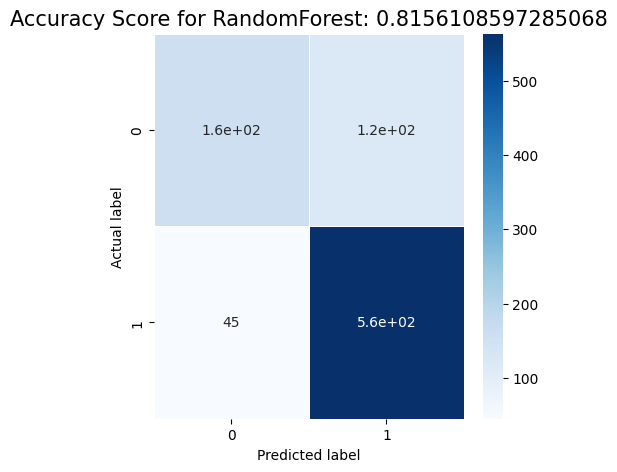

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for RandomForest: {0}'.format(rfc.score(X_test_pca, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
knn = KNeighborsClassifier(n_neighbors= 7, p= 2, weights='distance')
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

Text(0.5, 1.0, 'Accuracy Score for KNN: 0.8144796380090498')

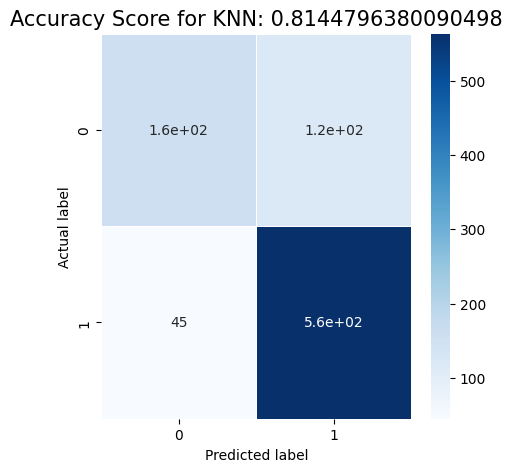

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for KNN: {0}'.format(knn.score(X_test_pca, y_test))
plt.title(all_sample_title, size = 15)